In [1]:
import sys
import os
from os.path import join
import numpy as np
import h5py
import matplotlib.pyplot as plt
import proplot as pplt

pplt.rc['grid'] = False
pplt.rc['cmap.discrete'] = False
pplt.rc['cmap.sequential'] = 'viridis'

In [2]:
datadir = './Diagnostics/Data/Measurements/2022-05-06/'
filenames = os.listdir(datadir)
filenames

['.DS_Store', '220506131851-scan1d.h5']

In [5]:
filename = '220506131851-scan1d.h5'
cam = 'Cam06'
ny = 512  # number of y pixels
nx = 612  # number of x pixels

In [6]:
file = h5py.File(join(datadir, filename), 'r')

In [7]:
# Errors and warnings from log
for i in range(file['log'].size):
    if not(file['/log'][i, 'level'] == 'INFO'.encode('utf')):
        timestr = datetime.fromtimestamp(file['/log'][0, 'timestamp']).strftime("%m/%d/%Y, %H:%M:%S")
        print(f"{timestr} {file['log'][i, 'message']}")

# Configuration data
for key in file['/config'].keys():
    print(f"{key}")
    print("--------------")
    for name in file['/config'][key].dtype.names:
        print(f"{name}: {file['config'][key][name]}")
    print()

environment
--------------
timestamp: [1.65185753e+09]
user: [b'46h']
host: [b'btf-diag-app1.ics.sns.gov']
cmd_line: [b'scan1d/sweep1d.py']
work_dir: [b'/home/46h/btf-scripts']

metadata
--------------
timestamp: [1.65185755e+09]
Test_LLRF:FCM_RFQ1:CtlAmpSet: [0.63]
RFTF_TM:Gate_BeamOn:RR: [5.]
BTF_MEBT_Mag:PS_QH01:I_Set: [157.94]
BTF_MEBT_Mag:PS_QV02:I_Set: [280.06]
BTF_MEBT_Mag:PS_QH03:I_Set: [6.75]
BTF_MEBT_Mag:PS_QV04:I_Set: [-3.75]
BTF_MEBT_Mag:PS_QH05:I_Set: [0.]
BTF_MEBT_Mag:PS_QV06:I_Set: [-0.]
BTF_MEBT_Mag:PS_QV07:I_Set: [-3.1]
BTF_MEBT_Mag:PS_QH08:I_Set: [4.1]
BTF_MEBT_Mag:PS_QV09:I_Set: [-1.85000002]
BTF_MEBT_Mag:PS_QV10:I_Set: [-1.9]
BTF_MEBT_Mag:PS_QH11:I_Set: [7.2]
BTF_MEBT_Mag:PS_QV12:I_Set: [-6.55]
BTF_MEBT_Mag:PS_QH13:I_Set: [6.00035858]
BTF_MEBT_Mag:PS_QH33:I_Set: [5.1]
BTF_MEBT_Mag:PS_QV34:I_Set: [-5.3]
BTF_MEBT_Mag:PS_DCH01:I_Set: [4.7]
BTF_MEBT_Mag:PS_DCV01:I_Set: [-3.]
BTF_MEBT_Mag:PS_DCH02:I_Set: [5.]
BTF_MEBT_Mag:PS_DCV02:I_Set: [-2.]
BTF_MEBT_Mag:PS_DCH34:I_Set

In [8]:
data = file['/scandata']
attrs = data.dtype.names
acts = [key for key in attrs if 'PositionSync' in key]
print('attrs:', attrs)
print('acts:', acts)

attrs: ('timestamp', 'iteration', 'bcm04', 'slowQ', 'Cam06_Image', 'Cam06_ProfileX', 'Cam06_ProfileY', 'y_PositionSync')
acts: ['y_PositionSync']


Extract the vertical beam profile.

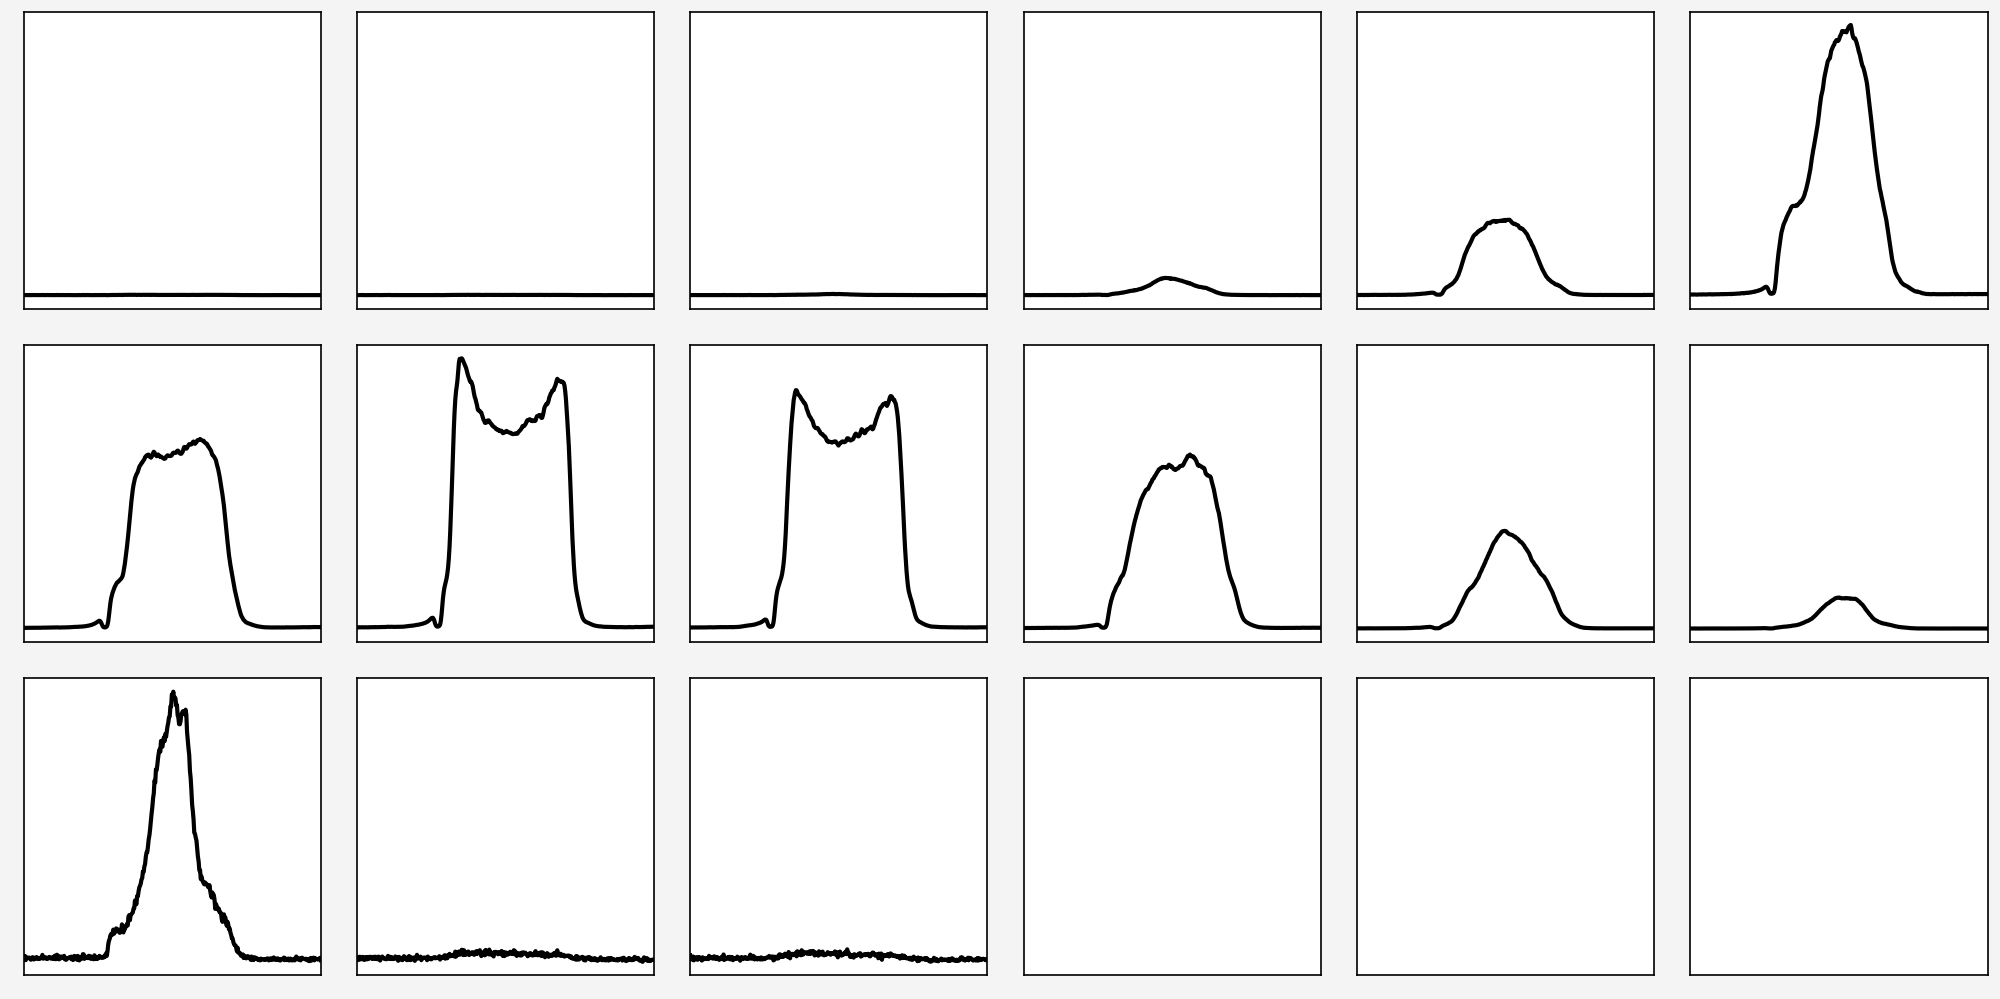

In [44]:
idx = list(range(0, len(data), 5))
ncols = 6
nrows = int(np.ceil(len(idx) / ncols))

fig, axes = pplt.subplots(ncols=ncols, nrows=nrows, figwidth=10.0)
axes.format(xticks=[], yticks=[])
for i, ax in zip(idx, axes):
    im = data[i, cam + '_Image'].reshape(ny, nx)
    profx = data[i, cam + '_ProfileX']
    profy = data[i, cam + '_ProfileY']
    cut = 100
    ax.plot(profx[cut:-cut], color='black')
#     axes[i].imshow(im)
plt.show()